# Title: Prediction of Different Sleep Disorders Based on a Variety of Factors
## Introduction
Sleep disorder is a type of disorder relatively prevalent among many people. The main symptoms include feeling difficult to fall asleep which is clinically called insomnia, and transient cessation of respiration happening recurrently during sleep, which is known as sleep apnea.

In this project, we are going to analyze and predict the occurrence of sleep disorders based on 5 referential factors including age, physical activity, blood pressure, heart rate, and sleep duration.

The dataset we are going to use is called the [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data). It is composed of 400 rows and 13 columns containing variables related to sleep, health and individual habits. Specifically, the variables comprise gender, age, occupation, sleep duration, quality of sleep, physical activity, stress level, BMI Category, blood pressure, heart rate, daily steps, and sleep disorder.
## Methods
For higher accuracy, our team chose to select objective columns/variables rather than subjective ones: 
- Age: years
- Physical activity: minutes/day
- Blood pressure: systolic/diastolic
- Heart rate: bpm
- Sleep duration: hours

The categorical class we selected is the sleep disorder column, which is one of: None, Insomnia, or Sleep Apnea.

Data will be plotted as a series of scatter plots with the age on the x-axis and the remaining variables (physical activity, blood pressure, heart rate, and sleep duration) on the y-axis. The labels (sleep disorder) will be colour-coded to make it easier to identify the labels of the nearest neighbours.

We will use K-nearest neighbours classification, where the optimal K will be selected using 5-fold cross-validation on the training set. To evaluate the accuracy of the K values, a line plot diagram will be used to compare the neighbours to the accuracy estimates.
## Expected Outcomes & Significance
We are trying to identify the factors correlated with sleep disorders. We expect to find a strong correlation between a variety of factors including physical activity, the numbers of sleep and the presence of sleep disorders.

If our classification model demonstrates good accuracy, analysis of sleep quality and amount of physical activity can support the identification of sleep disorders in patients to start medical treatment earlier and prescribe appropriate measures and medication. This will also enhance the potential research on sleep disorders to identify factors that carry more weight in the quality of sleep. This can help drive psychology and neuroscience research further in understanding the brain's structure and sleep's function
 
Furthermore,  to enhance the study, future research could involve testing and adjusting the model on a wider and more diverse population.


In [7]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [15]:


options(repr.plot.width = 10, repr.plot.height = 8)

sleep_data <- read_csv("Sleep_health_and_lifestyle_dataset.csv")
colnames(sleep_data) <- c("person_ID", "gender", "age", "occupation", "sleep_duration", "sleep_quality", "physical_activity", "stress_level", "BMI", "blood_pressure", "heart_rate", "daily_steps", "sleep_disorder")
sleep_data

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


person_ID,gender,age,occupation,sleep_duration,sleep_quality,physical_activity,stress_level,BMI,blood_pressure,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


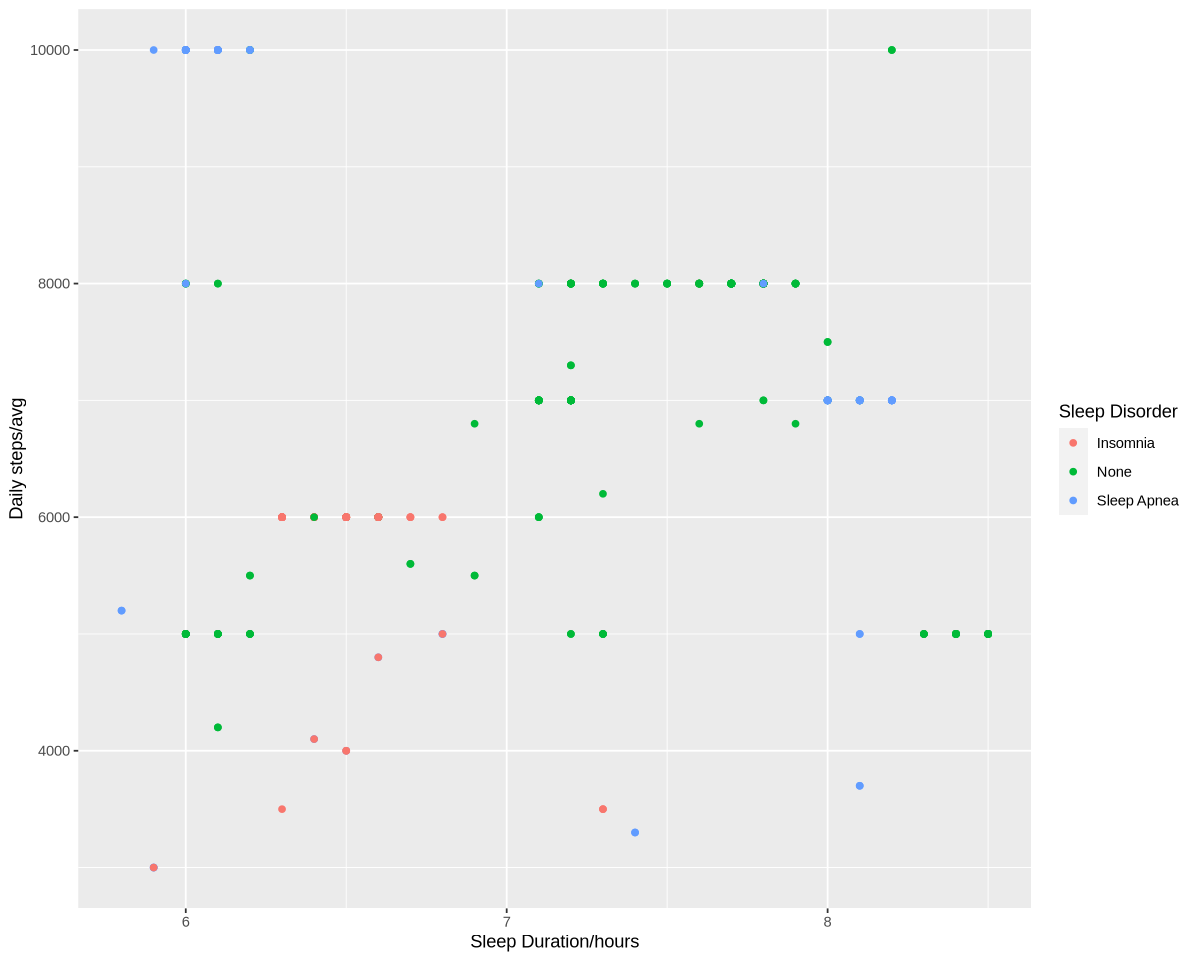

In [16]:
sleep_plot = sleep_data |> 
    ggplot(aes(x = sleep_duration, y = daily_steps)) +
    geom_point(aes(color = sleep_disorder)) +
    labs(x="Sleep Duration/hours", y = "Daily steps/avg", color = "Sleep Disorder")

sleep_plot